In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [3]:

housing = pd.read_csv('housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

It is important to have
a sufficient number of instances in your dataset for each stratum, or else the estimate
of the stratum’s importance may be biased. This means that you should not have too
many strata, and each stratum should be large enough. The following code uses the
pd.cut() function to create an income category attribute with 5 categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on:


In [5]:
housing["category"] = pd.cut(housing["price"],
 bins=[0,3.430000e+06,4.340000e+06 , 5.740000e+06,8.340000e+06, np.inf],
 labels=[1, 2, 3, 4, 5])

In [6]:
housing["category"].value_counts()

category
2    138
1    137
3    134
4    104
5     32
Name: count, dtype: int64

<AxesSubplot: >

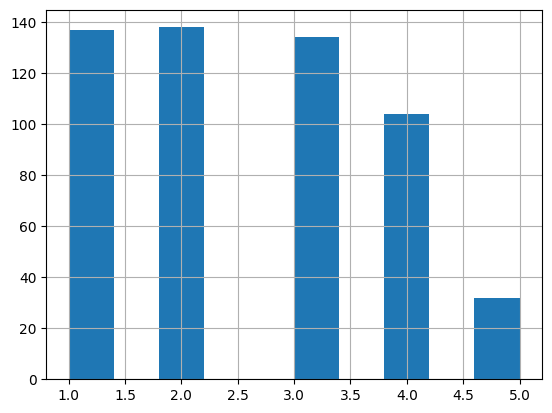

In [7]:
housing.category.hist()

In [8]:
object_cols = [col for col in housing.columns if housing[col].dtype == "object"]

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for feature_name in object_cols:
    housing[feature_name]= label_encoder.fit_transform(housing[feature_name]) 
    housing[feature_name].unique()
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,category
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,5
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,5
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,5
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,1


In [10]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)



price               1.000000
category            0.928967
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
housing[["area"]]=scaler.fit_transform(housing[["area"]])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,category
0,13300000,0.396564,4,2,3,1,0,0,0,1,2,1,0,5
1,12250000,0.502405,4,4,4,1,0,0,0,1,3,0,0,5
2,12250000,0.571134,3,2,2,1,0,1,0,0,2,1,1,5
3,12215000,0.402062,4,2,2,1,0,1,0,1,3,1,0,5
4,11410000,0.396564,4,1,2,1,1,1,0,1,2,0,0,5


In [12]:
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
category            0.928967
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation. Figure 2-14 shows various plots along with the correlation coeffi‐
cient between their horizontal and vertical axes

In [13]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["category"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

Since the dataset is not too large, you can easily compute the standard correlation
coecient (also called Pearson’s r) between every pair of attributes using the corr()
method:

In [14]:
strat_train_set

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,category
35,8080940,0.367698,3,2,4,1,0,0,0,1,2,0,0,4
242,4550000,0.136770,3,1,2,1,0,0,0,1,0,0,0,3
86,6510000,0.345017,3,1,3,1,0,1,0,0,0,1,2,4
404,3493000,0.223368,3,1,2,0,0,0,0,0,0,0,2,2
213,4893000,0.229897,4,2,1,1,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,5229000,0.373540,3,1,1,1,1,1,0,0,2,1,1,3
109,6090000,0.341237,4,2,2,1,1,0,1,0,1,0,1,4
142,5600000,0.608247,4,2,2,1,0,0,0,0,1,0,1,3
454,3143000,0.195876,3,1,2,1,0,0,0,1,0,0,2,1


In [15]:
 strat_test_set["category"].value_counts() 

category
2    28
1    27
3    27
4    21
5     6
Name: count, dtype: int64

Now let’s look at how much each attribute correlates with the median house value:

In [18]:
matrix=strat_train_set.corr()
matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,category
price,1.000000,0.549112,0.376278,0.522188,0.429794,0.296030,0.243482,0.181628,0.140394,0.424209,0.390905,0.330663,-0.239569,0.932555
area,0.549112,1.000000,0.144771,0.191585,0.088519,0.293790,0.166093,0.025786,0.015339,0.237505,0.358924,0.214168,-0.176171,0.546276
bedrooms,0.376278,0.144771,1.000000,0.399335,0.397984,-0.014190,0.092639,0.110032,0.076121,0.165623,0.145338,0.086727,-0.116416,0.359447
bathrooms,0.522188,0.191585,0.399335,1.000000,0.347741,0.013719,0.149229,0.117159,0.070913,0.176574,0.146358,0.079883,-0.088543,0.442424
stories,0.429794,0.088519,0.397984,0.347741,1.000000,0.113539,0.069494,-0.178561,0.012942,0.306961,0.032026,0.035594,-0.091699,0.405719
mainroad,0.296030,0.293790,-0.014190,0.013719,0.113539,1.000000,0.095674,0.026763,-0.034615,0.093658,0.176233,0.197851,-0.130248,0.341046
guestroom,0.243482,0.166093,0.092639,0.149229,0.069494,0.095674,1.000000,0.348692,0.008017,0.111176,0.051168,0.178603,-0.085907,0.271611
basement,0.181628,0.025786,0.110032,0.117159,-0.178561,0.026763,0.348692,1.000000,0.038866,0.014437,0.082623,0.240488,-0.074645,0.187792
hotwaterheating,0.140394,0.015339,0.076121,0.070913,0.012942,-0.034615,0.008017,0.038866,1.000000,-0.147631,0.074738,-0.070326,-0.017956,0.134212
airconditioning,0.424209,0.237505,0.165623,0.176574,0.306961,0.093658,0.111176,0.014437,-0.147631,1.000000,0.163682,0.091744,-0.100965,0.421049


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)